# Starting on numerical solver libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M1 = 0.0009  #Mjupiter in Msun
M2 = 1.0   #Msun

rp = 1.0 #AU
vp = 35.0 #km/s

In [3]:
#create initial vectors
r_0 = np.array([[rp, 0], [0, 0]])
v_0 = np.array([[0,vp], [0,0]])

In [4]:
delta_t = 1e5 #seconds
n_steps = 5000

In [5]:
from hermite_library import do_euler_2body

In [6]:
r_eu, v_eu, t_eu, E_eu = do_euler_2body(M1, M2, r_0, v_0, n_steps, delta_t)

In [7]:
r_eu

array([[[ 1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 1.00000000e+00,  2.33957219e-02],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 9.99601323e-01,  4.67914439e-02],
        [ 3.58809495e-07,  0.00000000e+00]],

       ...,

       [[-4.66415517e+00,  5.73539808e-01],
        [ 5.09773965e-03,  1.04722451e-01]],

       [[-4.66604927e+00,  5.67386129e-01],
        [ 5.09944435e-03,  1.04749045e-01]],

       [[-4.66792537e+00,  5.61230642e-01],
        [ 5.10113283e-03,  1.04775641e-01]]])

In [8]:
r_eu.shape

(5001, 2, 2)

Simple plots

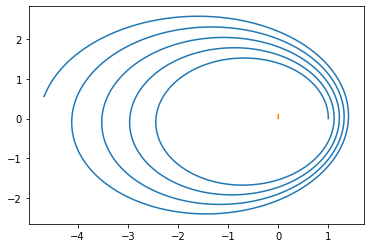

In [9]:
#r_eu[TIME STEPS, PARTICLE NUMBER, X OR Y COORD]
plt.plot(r_eu[:,0,0], r_eu[:,0,1])
plt.plot(r_eu[:,1,0], r_eu[:,1,1])
plt.show()

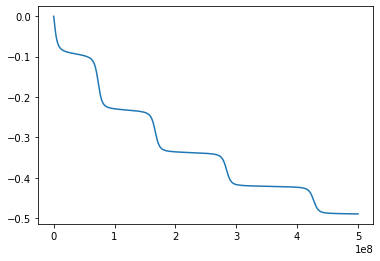

In [10]:
plt.plot(t_eu, E_eu)
plt.show()

Let's make a fancy plot!

NameError: name 'r_h' is not defined

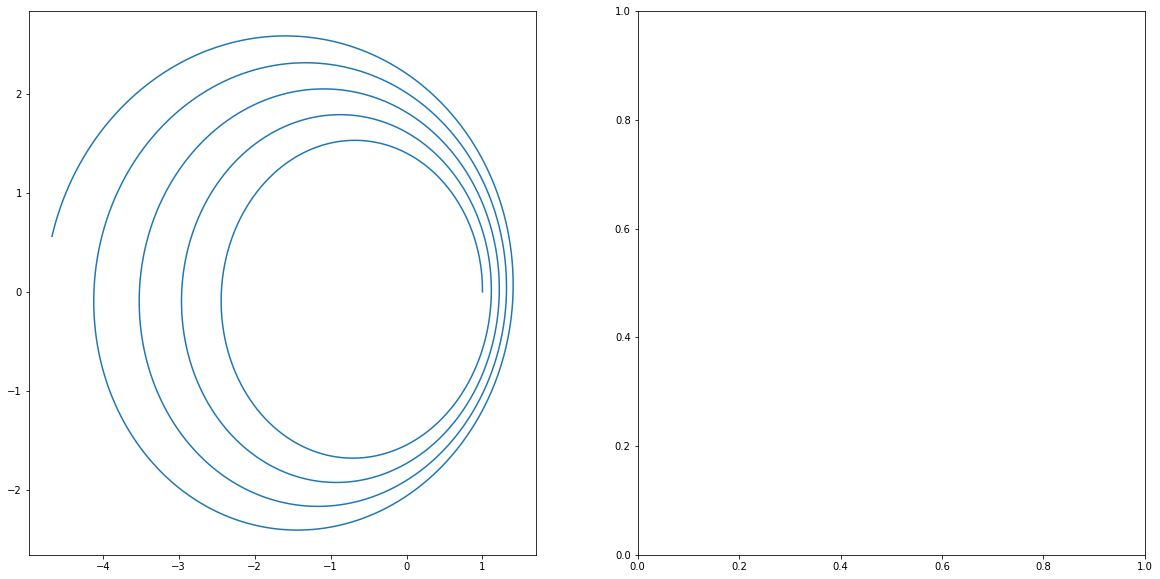

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10*2, 10))

ax[0].plot(r_eu[:,0,0], r_eu[:,0,1])
ax[0].plot(r_h[0,0, :], r_h[0,1,:])

ax[0].plot(r_eu[:,1,0], r_eu[:,1,1])
ax[0].plot(r_h[1,0,:], r_h[1,1,:])

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

ax[1].plot(t_eu, E_eu)
ax[1].plot(t_h, E_h)

ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

# Higher Order Solver

In [24]:
from hermite_library import do_hermite

In [13]:
star_mass = 1.0 #Msun, M2 from Euler
planet_mass = np.array([1.0]) #Mjupiter masses, M2 = 0.0009 Msun
#array with each entry[x position, y position, z position]
#for now no z position
planet_initial_position = np.array([[rp, 0, 0]])
planet_initial_velocity = np.array([[0, vp, 0]])
#this assumes that the star is at position (0,0,0)
#and has NO initial velocity, so its velocity is also (0,0,0)

In [14]:
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                                planet_mass, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                                tfinal = delta_t*n_steps, 
                                Nsteps = n_steps)

In [15]:
r_h

array([[[ 9.99051900e-01,  9.98852303e-01,  9.98253682e-01, ...,
          7.65724897e-01,  7.77697567e-01,  7.89424871e-01],
        [ 0.00000000e+00,  2.33768149e-02,  4.67442917e-02, ...,
         -7.69184794e-01, -7.50711124e-01, -7.32000617e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-9.48100253e-04, -9.47910836e-04, -9.47342745e-04, ...,
         -7.26672927e-04, -7.38034992e-04, -7.49164202e-04],
        [ 0.00000000e+00, -2.21845973e-05, -4.43603328e-05, ...,
          7.29956369e-04,  7.12424857e-04,  6.94668585e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [16]:
r_h.shape

(2, 3, 5000)

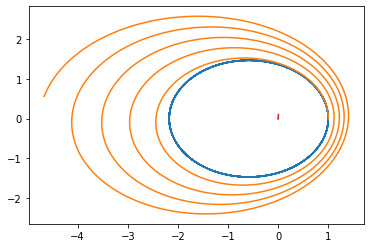

In [17]:
#r_h([NUMBER OF PARTICLES, NUMBER COORDINATES(X,Y,Z)], NUMBER OF TIMESTEPS)
#particle 1 Hermite solution
plt.plot(r_h[0,0,:], r_h[0,1,:])
plt.plot(r_eu[:,0,0], r_eu[:,0,1])
#particle 2 Hermite solution
plt.plot(r_h[1, 0, :], r_h[1, 1, :])
plt.plot(r_eu[:, 1, 0], r_eu[:, 1, 1])
plt.show()

# FINALLY N-BODY

In [32]:
star_mass = 1.0 #Msun, M2 from Euler
planet_mass = np.array([1.0, 0.5, 2.0, 3.0, 2.5]) #Mjupiter masses, M2 = 0.0009 Msun
#array with each entry[x position, y position, z position]
#for now no z position
planet_initial_position = np.array([[0, 1.0, 0],
                                    [0, 2.0, 0],
                                    [0, 3.0, 0],
                                    [0, 4.0, 0],
                                    [0, 2.5, 0]])
planet_initial_velocity = np.array([[20, 1.0, 0],
                                    [14, 1.0, 0],
                                    [14, 1.0, 0],
                                    [14, 1.0, 0],
                                    [14, 1.0, 0]])
#this assumes that the star is at position (0,0,0)
#and has NO initial velocity, so its velocity is also (0,0,0)

In [33]:
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                                planet_mass, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                                tfinal = delta_t*n_steps, 
                                Nsteps = n_steps)

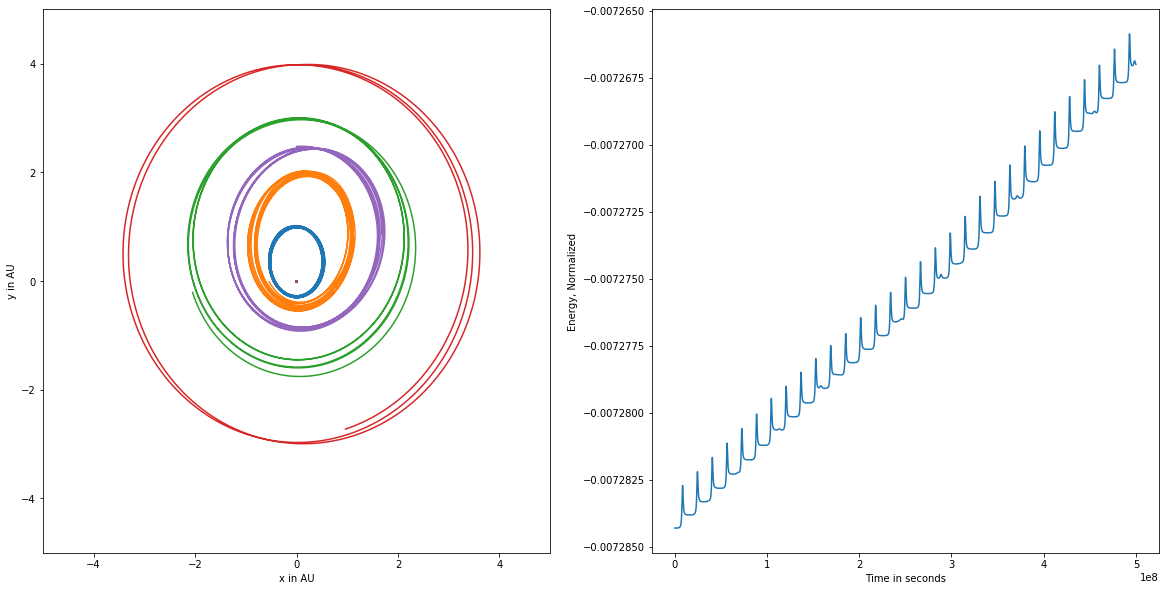

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10*2, 10))

#ax[0].plot(r_h[0,0, :], r_h[0,1,:])

#ax[0].plot(r_h[1,0,:], r_h[1,1,:])

#ax[0].plot(r_h[2,0,:], r_h[2,1,:])

for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i, 0, :], r_h[i, 1, :])

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-5,5)

ax[1].plot(t_h, E_h)

ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

# Saving to a file

In [196]:
t = np.array([0,1,2,3])
x = np.array([-5,-6,7,8])

In [197]:
np.savetxt("mytxtfile.txt", [t,x], delimiter=',')

In [198]:
from hermite_library import save_hermite_solution_to_file

In [199]:
save_hermite_solution_to_file("MyFirstPlanetarySystem1.txt", t_h, E_h, r_h, v_h)

In [200]:
from hermite_library import read_hermite_solution_from_file

In [203]:
t_h2, E_h2, r_h2, v_h2 = read_hermite_solution_from_file("MyFirstPlanetarySystem1.txt")

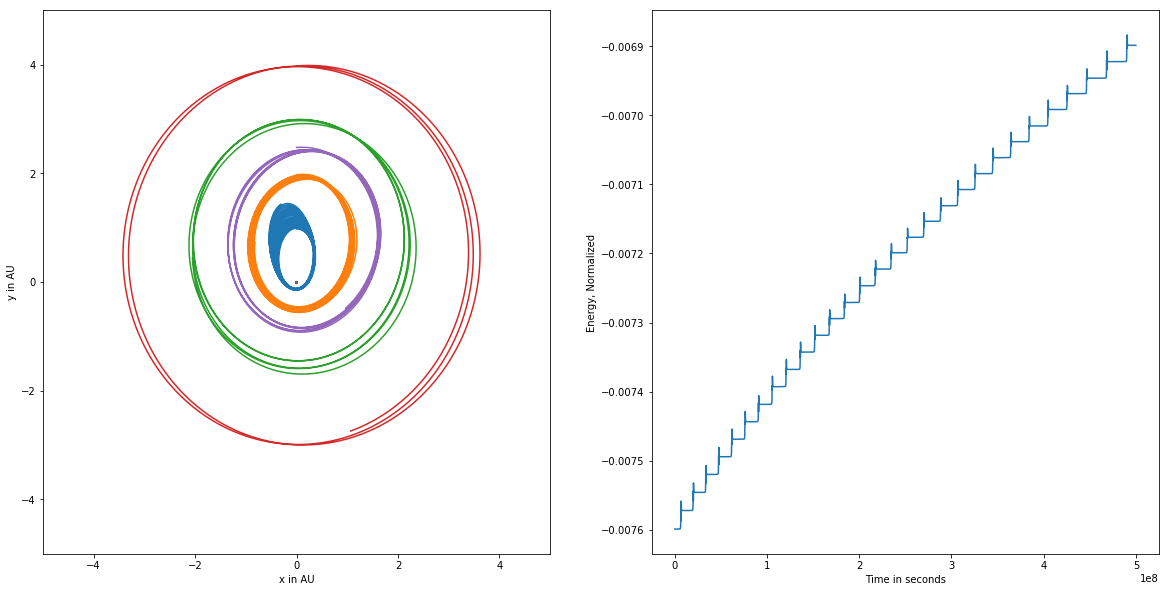

In [204]:
fig, ax = plt.subplots(1,2, figsize=(10*2, 10))

#ax[0].plot(r_h[0,0, :], r_h[0,1,:])

#ax[0].plot(r_h[1,0,:], r_h[1,1,:])

#ax[0].plot(r_h[2,0,:], r_h[2,1,:])

for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i, 0, :], r_h[i, 1, :])

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-5,5)

ax[1].plot(t_h, E_h)

ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

# Kepler Orbits

In [207]:
from convert_kepler_data import read_kepler_data

In [208]:
kepler_data = read_kepler_data('kepler101data.txt')

In [209]:
kepler_data['ecc']

array([ 0.086,  0.   ], dtype=float32)

In [211]:
from convert_kepler_data import convert_kepler_data
star_mass, planet_mass, planet_initial_position, planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

In [212]:
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                                planet_mass, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                                tfinal = delta_t*n_steps, 
                                Nsteps = n_steps)